<h1>Problem Statement </h1>
<pre>
A company wants to understand purchase pattern aginst various product of differnt categories. purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

<h2>Variable Use in DataSet</h2>
$User_ID                     User ID      
$Product_ID                  Product ID
$Gender                      Sex of User
$Age                         Age of bins
$Occupation                  Occupation
$Marital_Status              Marital Status    
$City_Category
$Stay_In_Current_City_Years  Number of years stay in current city
$Product_Category_1           
$Product_Category_2       
$Product_Category_3 
$Purchase                    Purchase Amount (Target Variable)
 
 
 
 
 

<h2>Importing the libraries</h2>

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

<h2> Defining DataaFrame</h2>

In [3]:

data=pd.read_csv("train.csv")

<h3>EDA -Exploratory Data Analysis</h3>

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [6]:
data.shape[0] #for calculating number of rows

550068

In [7]:
data.shape[1] #for calculating number of columns

12

In [8]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [9]:
# for knowning for information abou column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


<pre> 
<b>Age</b> Should be treated as numerical column.
<b>City_category</b> we can convert this to a numerical column and should look at the frequency of each city category.
<b>Gender</b> has two values and should be converted to binary values.
<b>Product_category_2 and product_category_3</b> has null values.
</pre>


data.dtypes #show datatype

<h3>Unique elements in each attributes</h3>

In [10]:

data.nunique() #finding number  of unique value in each column

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

<h3>Checking Null Values</h3>

In [11]:
data.isnull().sum() # for calculating toatl null value in each column

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

<h3>Target Variable Purchase</h3>

C:\python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


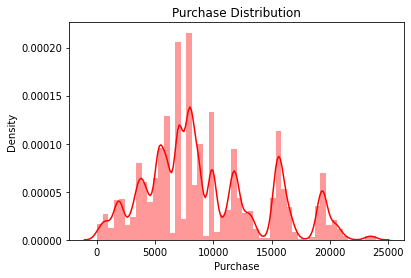

In [12]:
sns.distplot(data["Purchase"],color='r')
plt.title("Purchase Distribution")
plt.show()

<pre>We can observe that purchase amount is repeating for many customers.
This may be because on Black Friday many are buying discounted products in large numbers and kind of follows a Gaussian Distribution.</pre>

C:\python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


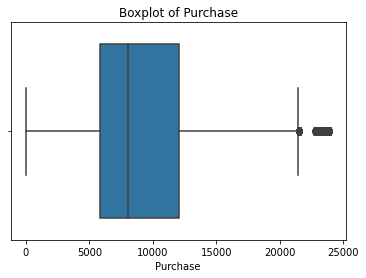

In [13]:
sns.boxplot(data["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

<pre>
<b>Skewness</b>
I found that it is right skew data set it means there are outliers in 
data 
<b>kurtosis</b>
I found it is platkurtic because its value is less than 
</pre>

In [14]:
data["Purchase"].skew()

0.6001400037087128

In [15]:
data["Purchase"].kurtosis()

-0.3383775655851702

In [16]:
data["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

<h3>Gender</h3>

C:\python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

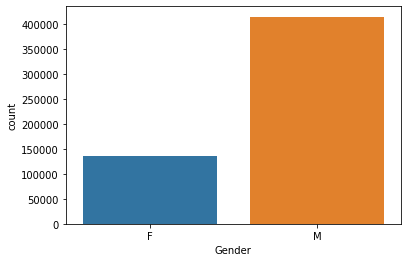

In [17]:
sns.countplot(data['Gender'])
 

In [18]:
# to get data in percentage formate
data['Gender'].value_counts(normalize=True)*100


M    75.310507
F    24.689493
Name: Gender, dtype: float64

In [19]:
# Calculate purchase gender wise
data.groupby("Gender").mean()  ["Purchase"]

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

<h3>Marital Status</h3>

C:\python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


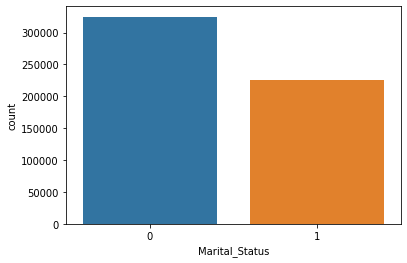

In [20]:
sns.countplot(data['Marital_Status'])
plt.show()

<pre>There are more unmarried people in the dataset who purchase more </pre>

In [21]:
data.groupby("Marital_Status").mean()["Purchase"]

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

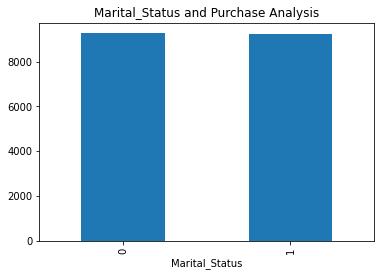

In [22]:
data.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

<pre>
This is interesting though unmarried people spend more on purchasing, the average purchase amount of married and unmarried people are the same.</pre>

<h3>Occupation</h3>

C:\python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


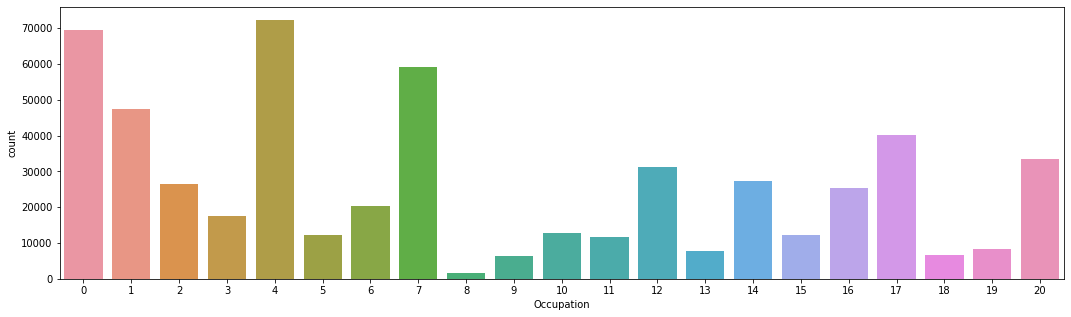

In [24]:
plt.figure(figsize=(18,5))
sns.countplot(data['Occupation'])
plt.show()

<pre>
Occupation has at least 20 different values. Since we do not known to each occupation each number corresponds, is difficult to make any analysis. Furthermore, it seems we have no alternative but to use since there is no way to reduce this number</pre>

In [25]:
occup = pd.DataFrame(data.groupby("Occupation").mean()["Purchase"])
occup

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


<h3> City_Category </h3>

C:\python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


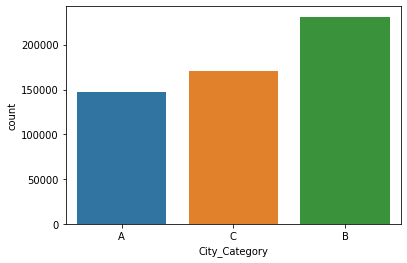

In [26]:
sns.countplot(data['City_Category'])
plt.show()

<code>It is observed that city category B has made the most number of puchases.</code>

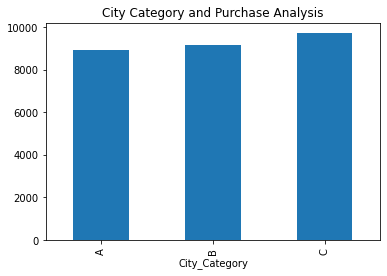

In [27]:
data.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()

<code> the city whose buyers spend the most is city type ‘C’.</code>

<h3>Stay_In_Current_City_Years</h3>

C:\python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

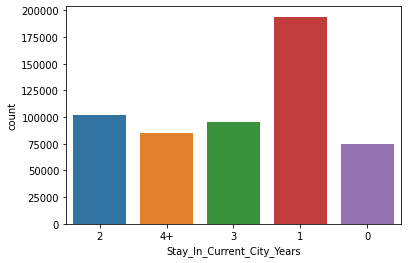

In [30]:
sns.countplot(data['Stay_In_Current_City_Years'])

<code>It shows that the person living in that city the less prone they are to buy new things.Hence, if someone is new in new in the town needs a great number of new things for their house that they'll take advantage of the low prices in Black friday to purchase all the things needed.</code>

<h3>Age</h3>

C:\python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Different Categories of Age')

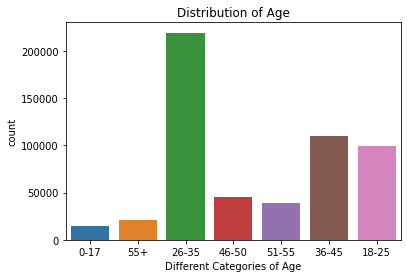

In [32]:
sns.countplot(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
 

<code>Age 26-35 Age group makes the most no of purchases in the age group.</code>

<AxesSubplot:xlabel='Age'>

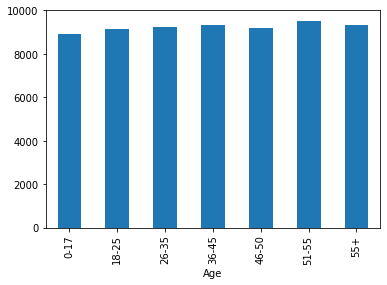

In [33]:
data.groupby("Age").mean()["Purchase"].plot(kind='bar')

<code>Mean puchase rate between the age groups tends to be the same except that the 51-55 age group has a little higher average purchase amount</code>

<h3>Product_Category_1</h3>

C:\python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

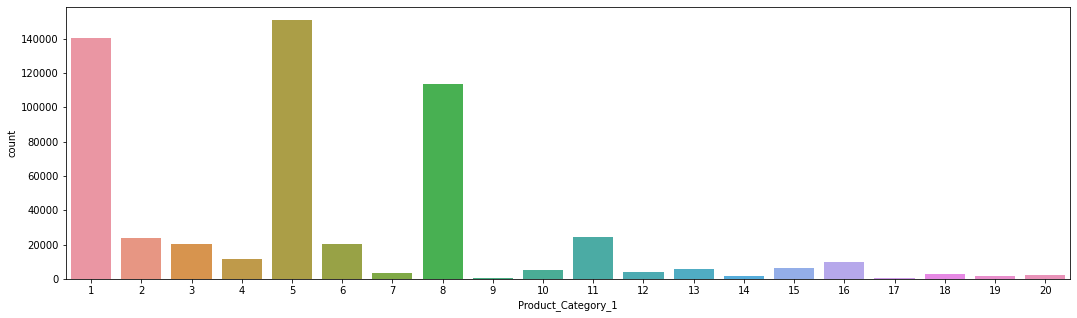

In [34]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_1'])


<code>It is clear that Product_Category_1 numbers 1,5 and 8 stand out. Unfortunately we don't know which product each number represents as it is masked.</code>

<h3>Product_Category_2</h3>

C:\python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

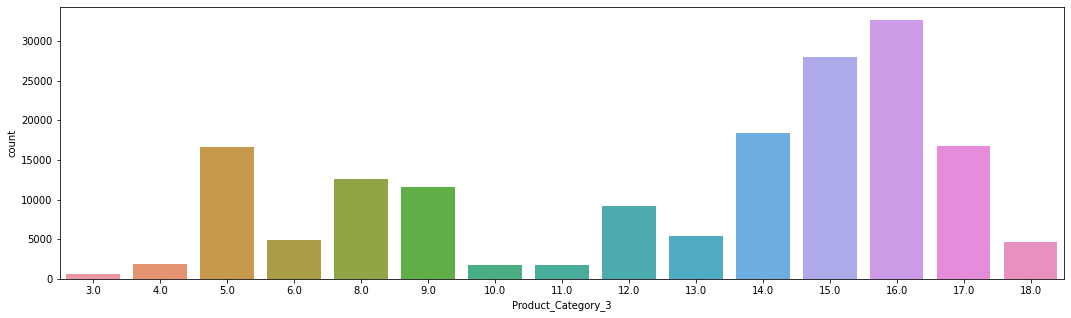

In [35]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_3'])

<h3>Product_Category_3</h3>

C:\python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

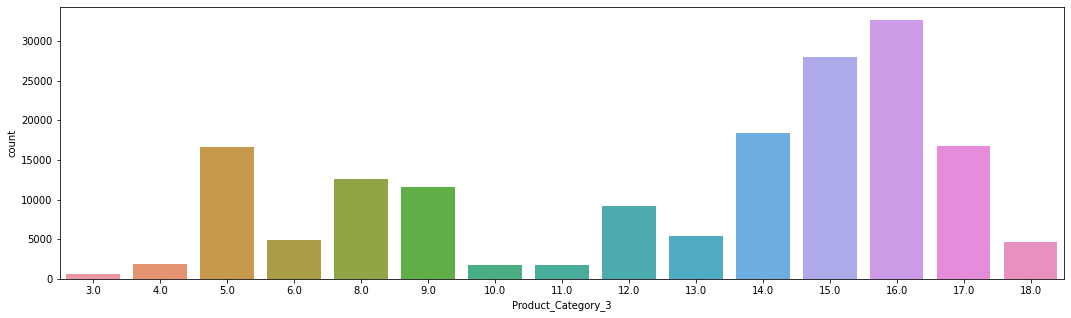

In [36]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_3'])

In [37]:
data.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


<h3>HeatMap</h3>

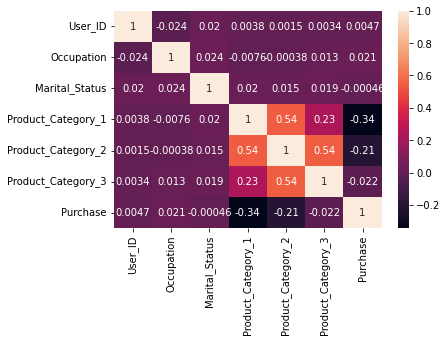

In [39]:
sns.heatmap(data.corr(),annot=True)
plt.show()